<a href="https://colab.research.google.com/github/akshatsinghania/alphabet-prediction-neural-neworks/blob/master/alphabet_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

tf.__version__

'2.5.0'

In [ ]:
mnist = tf.keras.datasets.mnist # 28 x 28 imgs of handwritten alphabets
(x_train,y_train),(x_test,y_test) = mnist.load_data()

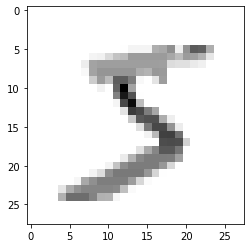

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
#hidden layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
#output layer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

#traning
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 2.8019 - accuracy: 0.8564
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3875 - accuracy: 0.9070
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2893 - accuracy: 0.9258


In [ ]:
#test real accuracy apart from training images
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3532 - accuracy: 0.9268


[0.35321328043937683, 0.926800012588501]

In [ ]:
model.save('number-reader.model')  

INFO:tensorflow:Assets written to: number-reader.model/assets


expected answer
7
give answer
7


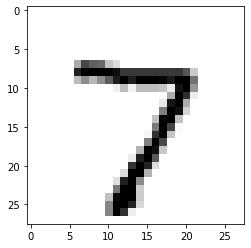

In [ ]:
#load model
number_reader = tf.keras.models.load_model('number-reader.model')
#img
plt.imshow(x_test[0],cmap=plt.cm.binary)
#expected answer
print('expected answer')
print(y_test[0])
#predicted answer
predictions = number_reader.predict(x_test)
import numpy as np
print('give answer')
print(np.argmax(predictions[0]))